In [1]:
%matplotlib inline
from matplotlib import style #importing visualization style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt #plot tool import

In [2]:
 import numpy as np 
import pandas as pd

In [3]:
import datetime as dt #The datetime module supplies classes for manipulating dates 
#and times in both simple and complex ways. While date and time arithmetic is supported,
#the focus of the implementation is on efficient attribute extraction for output formatting and manipulation. 
#For related functionality, see also the time and calendar modules.

In [4]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
#importing sqlalchemy module with 'automap_base','session','varies functions such as func'

In [5]:
 engine = create_engine("sqlite:///hawaii.sqlite") #creating engine for sqlite  file

In [6]:
Base = automap_base() #creating out automap_base variable function
# reflect the tables
Base.prepare(engine, reflect=True) #calling the 'engine' module to reflect the sqlite data into a table format

In [7]:
Base.classes.keys() #shows the keys 

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [10]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date) 

#breakdown - making a variable, using 'session.query' tool to fetch 'measurement' column, 
#then fetching the 'date' data in that column, using 'order_by' .desc()*last result, with
# .first() which is calling out the first result. Then we 'print' the result.

('2017-08-23',)


In [12]:
minus_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(minus_year_ago)

#breakdown -- i am trying to minus exalty one year from the date above. So, we 
#call our 'dt' from above, place in the year, the month, day, and '-' the 
#'dt' timedelta(days=365)--this is self explanatory. Then print the results

2016-08-23


In [13]:
#perform a query to retrieve the data and prcp values
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > minus_year_ago).\
    order_by(Measurement.date).all()

#save as dataframe and set index to date 
prcp_data_df = pd.DataFrame(prcp_data)
prcp_data_df.head()

#breakdown -- Creating a simple table with the data we are recalling. Created a variable called
#'prcp_data' and used our 'session.query' tool, do our usual commands for this tool, used 'filter'
#to filter out the data that is greater than our variable we created above.'.all()' will recall 
#all data that applies. Then we created our dataframe table, with our variable we created above, 
#the we call out the first five results (.head())

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [14]:
prcp_data_df.set_index('date').head()

#this is setting the table index table to 'date'

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


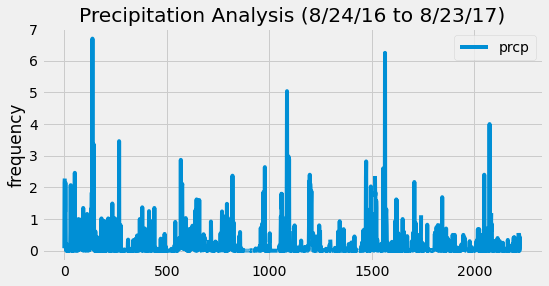

In [15]:
ax = prcp_data_df.plot(figsize=(8,4))
ax.set_title("Precipitation Analysis (8/24/16 to 8/23/17)")
ax.set_ylabel('frequency')
plt.show()

#Breakdown -- very simple bar graph. We set the 'ax' up, place a title, a y-axis label, x-axis label
#then show. 

In [16]:
#Use Pandas to print the summary statistics for the precipitation data.
prcp_data_df.describe()

#'.describe()' prints all the statical data for 'prcp_data_df'

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# How many stations are available in this dataset?
locations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations available.".format(locations))

#Breakdown -- create a location variable, use the 'session.query' tool to fetch 'Measurement'
#use 'group_by' to group by 'station', use '.count()' and then print the results, for 'print'
#you can see I used the '.format' to pull 'locations'. '.format()' method are essentially tuple 
#data types and each individual value contained in the tuple can be called by its index number, 
#which starts with the index number 0.
#cite -- https://www.geeksforgeeks.org/python-format-function/


There are 9 stations available.


In [18]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

last_twelve_months = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_twelve_months


#date.strftime(format)
#Return a string representing the date, controlled by an explicit format string.
#Format codes referring to hours, minutes or seconds will see 0 values. 
#cite -- https://docs.python.org/2/library/datetime.html

datetime.datetime(2016, 8, 23, 0, 0)

In [19]:
# Retrieve the last 12 months of precipitation data
p_results = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= last_twelve_months).\
                    group_by(Measurement.date).all()
p_results


#using the 'session.query' tool again, fetching the data, filtering the data, and then grouping the data.
#finally print of the result. 

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [20]:
# Design a query to find the most active stations.
# List the stations and observation counts in descending order
# Which station has the highest number of observations? - USC00519281 with 2772 observations
s_results = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
s_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
best_station = s_results[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == best_station).all()

[(54.0, 71.66378066378067, 85.0)]

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
t_results = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == best_station).\
                filter(Measurement.date >= last_twelve_months).all()
tobs_df = pd.DataFrame(t_results)
tobs_df.set_index('station', inplace=True)
tobs_df.head()

#Breakdown, much of the same as prior cells but this one is for station 



,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


<function matplotlib.pyplot.show(*args, **kw)>

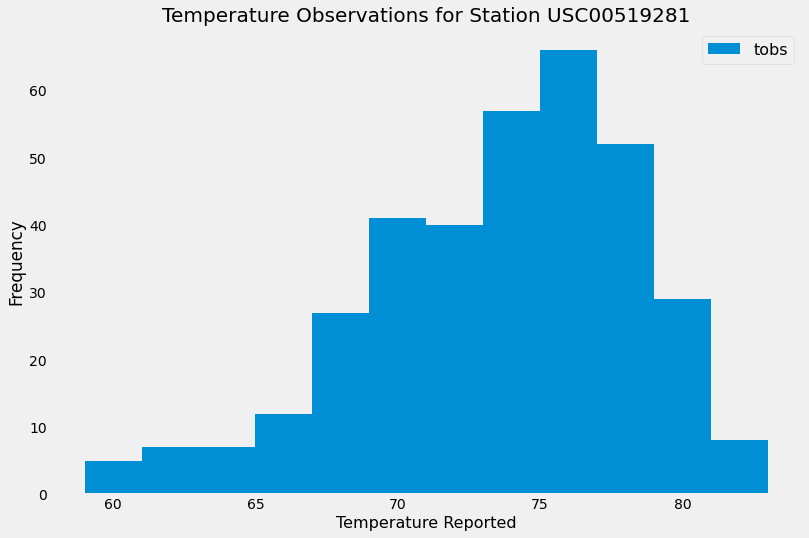

In [23]:
# Plot the results as a histogram with bins=12.
tobs_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title("Temperature Observations for Station " + best_station, fontsize=20)
plt.xlabel("Temperature Reported", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.show

#Breakdown -Creating a basic bar chart again but this time is for the Temp. Observations with our
#Variable input in the 'plt.title' line of code 

In [24]:

#BONUS CONTENT


#This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2014-02-28', '2014-03-05'))

#def is the keyword for a function header. This function is 'calc_temps', where we want to calculate
# the min, ave, and max temp for a list of dates
#A 'return' statement is used to end the execution of the function call and “returns” the result 
# (value of the expression following the return keyword) to the caller. 


#https://www.geeksforgeeks.org/python-return-statement/

[(57.0, 67.64444444444445, 76.0)]


In [25]:

#set trip dates and previous dates
trip = '2019-04-01 to \n 2019-04-14'
tripStartDate = '2017-04-01'
tripEndDate = '2017-04-14'

#calculate the tmin, tavg, and tmax 
tripTemps = calc_temps(tripStartDate, tripEndDate)

tripTemps

[(67.0, 74.5, 82.0)]

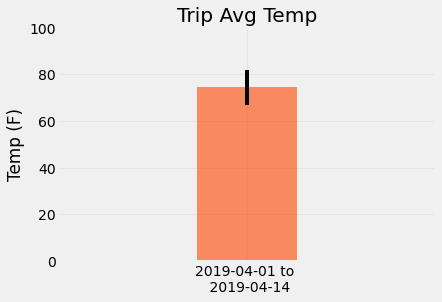

In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

minTripTemp = tripTemps[0][0]
avgTripTemp = tripTemps[0][1]
maxTripTemp = tripTemps[0][2]

minError = avgTripTemp - minTripTemp #to set up min on bar graph
maxError = maxTripTemp - avgTripTemp #to set up stat error

errorBars = np.array([[minError], [maxError]])

plt.bar(trip, avgTripTemp, yerr=errorBars, color = 'orangered', alpha = .6)
plt.ylim(0, 100)
plt.xlim(-1.5, 1.5)
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.grid(alpha=.3)

In [27]:

#query for precipitation per station on trip dates
sel = ([Station.station, 
        Station.name, 
        func.sum(Measurement.prcp), 
        Station.latitude, 
        Station.longitude, 
        Station.elevation
       ])

stationRain = (session.query(*sel)
                   .filter(Station.station == Measurement.station)
                   .filter(Measurement.date >= tripStartDate)
                   .filter(Measurement.date <= tripEndDate)
                   .group_by(Station.station)
                   .order_by(func.sum(Measurement.prcp).desc())
                   .all())

#convert query object to data frame
stationRainTable = pd.DataFrame(np.array(stationRain))
#rename columns
stationRainTable = stationRainTable.rename(columns={0: "Station", 1: "Location", 
                                                    2: "Total Precipitation", 3: "Latitude", 
                                                    4: "Longitude", 5: "Elevation"})

stationRainTable

,Station,Location,Total Precipitation,Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",4.85,21.3331,-157.8025,152.4
1,USC00519281,"WAIHEE 837.5, HI US",3.76,21.45167,-157.84888999999998,32.9
2,USC00513117,"KANEOHE 838.1, HI US",1.19,21.4234,-157.8015,14.6
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.8999999999999999,21.5213,-157.8374,7.0
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.36,21.33556,-157.71139,19.5
5,USC00519397,"WAIKIKI 717.2, HI US",0.26,21.2716,-157.8168,3.0
6,USC00517948,"PEARL CITY, HI US",0.0,21.3934,-157.9751,11.9


In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [36]:
#set the start and end date for the trip
startDate = "2019-04-08"
endDate = "2019-04-19"

#calculate trip length
startNum = int(startDate[-2:])
endNum = int(endDate[-2:])
tripLength = endNum - startNum + 1

#start date as datetime object
startDate = dt.datetime.strptime(startDate, '%Y-%m-%d')
#list dates (MM-DD) of trip
dateList = [dt.datetime.strftime(startDate + dt.timedelta(days = x), '%m-%d') 
            for x in range(0, tripLength)]

#calculate normals for each date
tripNormals = [daily_normals(date) for date in dateList]

tripNormals

[[(66.0, 72.10526315789474, 77.0)],
 [(62.0, 71.6140350877193, 78.0)],
 [(64.0, 71.40350877192982, 79.0)],
 [(65.0, 72.49180327868852, 82.0)],
 [(65.0, 72.22413793103448, 80.0)],
 [(64.0, 71.52542372881356, 79.0)],
 [(65.0, 72.75, 81.0)],
 [(61.0, 71.79310344827586, 79.0)],
 [(62.0, 71.55357142857143, 81.0)],
 [(65.0, 71.93103448275862, 77.0)],
 [(67.0, 72.49152542372882, 77.0)],
 [(65.0, 72.42105263157895, 83.0)]]

In [37]:
tripNormals = [np.array(normal[0]) for normal in tripNormals]

#convert normals list into a data frame
normalsTable = pd.DataFrame(tripNormals)
#add date column
normalsTable["Date"] = dateList
#set index and rename columns
normalsTable = normalsTable.set_index("Date")
normalsTable = normalsTable.rename(columns={0: "t-min", 1: "t-ave", 2: "t-max"})

normalsTable

,t-min,t-ave,t-max
Date,,,
04-08,66.0,72.105263,77.0
04-09,62.0,71.614035,78.0
04-10,64.0,71.403509,79.0
04-11,65.0,72.491803,82.0
04-12,65.0,72.224138,80.0
04-13,64.0,71.525424,79.0
04-14,65.0,72.750000,81.0
04-15,61.0,71.793103,79.0
04-16,62.0,71.553571,81.0


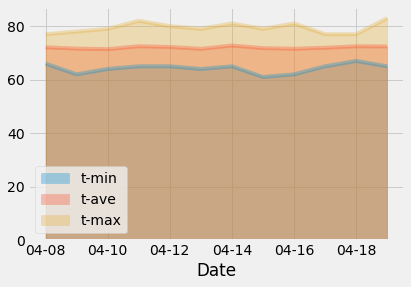

In [38]:
#plot with pandas
normalsTable.plot.area(stacked=False, alpha=.333,)